In [318]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats.stats import pearsonr
import pickle
%matplotlib inline

In [319]:
dataset = pd.read_csv("Data.csv")
#x = "Id title distributor Genre leadActor Actor popularity director Director popularity Sentiment num_theaters runtime_mins releaseYear CULT_INDEX CPI prod_budget_ADJ rev_totalGross_ADJ".split()

In [320]:
df=pd.DataFrame(dataset)

In [321]:
df

,Id,title,distributor,Genre,leadActor,Actor popularity,director,Director popularity,Sentiment,num_theaters,runtime_mins,releaseYear,CULT_INDEX,CPI,prod_budget_ADJ,rev_totalGross_ADJ
0,3468,Whipped,Destination,Comedy,Amanda Peet,7.599365,Peter Cohen,1.120000,-1,1581,82,2000,5.530000e-10,172.200,4.146341e+06,1.090221e+07
1,3384,Little Nicky,New Line,Comedy,Adam Sandler,7.883535,Steven Brill,1.841047,-1,2910,84,2000,5.260000e-11,172.200,1.174797e+08,1.034267e+08
2,3381,The Ladies Man,Paramount,Comedy,Tim Meadows,1.939280,Reginald Hudlin,1.618813,-1,2022,84,2000,2.290000e-10,172.200,3.317073e+07,3.568550e+07
3,3448,The Tao of Steve,Sony Classics,Comedy,Donal Logue,3.748402,Jenniphr Goodman,1.400000,1,9,87,2000,5.730000e-05,172.200,1.415128e+06,1.137976e+07
4,3455,Turn It Up,New Line,Music Drama,Pras,1.156000,Robert Adetuyi,1.178253,1,661,87,2000,5.670000e-09,172.200,1.796748e+07,3.270542e+06
5,3337,Cecil B. Demented,Artisan,Comedy,Melanie Griffith,4.050260,John Waters,2.655440,1,9,88,2000,8.830000e-06,172.200,4.186671e+05,3.366715e+06
6,3344,The Crew,Buena Vista,Crime Comedy,Richard Dreyfuss,2.677116,Michael Dinner,1.063944,1,1510,88,2000,5.250000e-10,172.200,5.252033e+07,3.413001e+07
7,3347,Down to You,Miramax,Romantic Comedy,Freddie Prinze,2.818751,Kris Isacsson,1.008891,1,1971,89,2000,1.760000e-10,172.200,4.837398e+07,5.259552e+07
8,3465,Whatever It Takes,Sony / Columbia,Romantic Comedy,Shane West,5.635719,David Raynr,1.004854,1,2272,94,2000,2.290000e-10,172.200,4.422764e+07,2.292010e+07
9,3369,Hanging Up,Sony / Columbia,Comedy / Drama,Meg Ryan,4.863958,Diane Keaton,6.070353,1,2618,95,2000,7.480000e-11,172.200,8.292683e+07,9.447804e+07


In [322]:
reg = linear_model.LinearRegression()

In [323]:
Y = df["rev_totalGross_ADJ"].values
X = df.drop(["rev_totalGross_ADJ","Id"], axis=1).values

<Container object of 2082 artists>

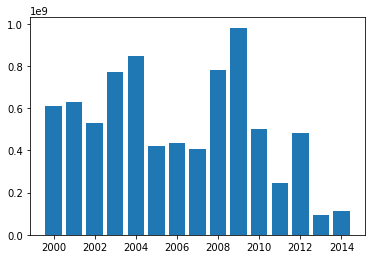

In [324]:
plt.bar(df["releaseYear"],Y)

<Container object of 2082 artists>

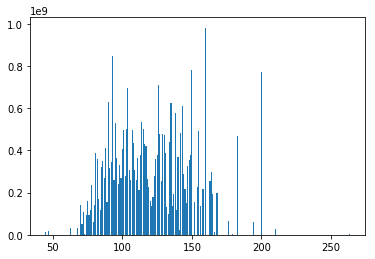

In [325]:
plt.bar(df["runtime_mins"],Y)

In [326]:
pearsonr(df["Actor popularity"],df["rev_totalGross_ADJ"])

(0.24602328963442616, 4.4479008147141943e-30)

In [327]:
pearsonr(df["Director popularity"],df["rev_totalGross_ADJ"])

(0.19416409954688243, 3.9134872168322091e-19)

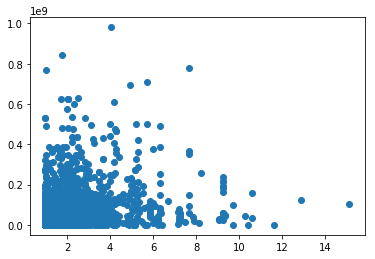

In [328]:
plt.scatter(df["Director popularity"],df["rev_totalGross_ADJ"])

<Container object of 2082 artists>

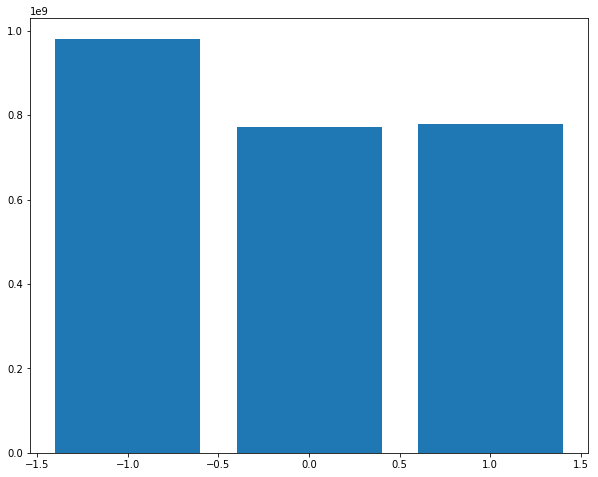

In [329]:
plt.figure(figsize=(10,8))
plt.bar(df["Sentiment"],df["rev_totalGross_ADJ"])

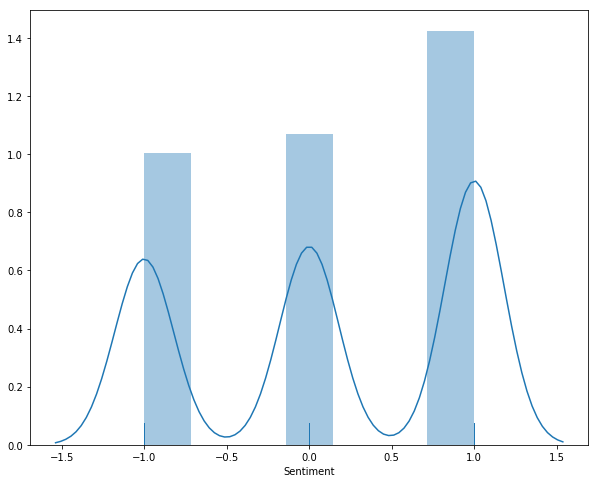

In [330]:
plt.figure(figsize=(10,8))
sns.distplot(df.Sentiment, rug=True)

In [331]:
t = df.title.str.get_dummies()

In [332]:
g = df.Genre.str.get_dummies()

d = df.distributor.str.get_dummies()

direc = df.director.str.get_dummies()

la = df.leadActor.str.get_dummies()

In [333]:
final_data = pd.concat([df,t,d,g,direc,la], axis = 1)

In [334]:
final_data

,Id,title,distributor,Genre,leadActor,Actor popularity,director,Director popularity,Sentiment,num_theaters,...,Zachary Gordon,Zero Mostel,Zhang Ziyi,Zoe Saldana,see Cast,stand-up comedy of Steve Harvey,the American spirit,the Mid-Ocean Ridge,voices of Craig T. Nelson,voices of Don Johnson
0,3468,Whipped,Destination,Comedy,Amanda Peet,7.599365,Peter Cohen,1.120000,-1,1581,...,0,0,0,0,0,0,0,0,0,0
1,3384,Little Nicky,New Line,Comedy,Adam Sandler,7.883535,Steven Brill,1.841047,-1,2910,...,0,0,0,0,0,0,0,0,0,0
2,3381,The Ladies Man,Paramount,Comedy,Tim Meadows,1.939280,Reginald Hudlin,1.618813,-1,2022,...,0,0,0,0,0,0,0,0,0,0
3,3448,The Tao of Steve,Sony Classics,Comedy,Donal Logue,3.748402,Jenniphr Goodman,1.400000,1,9,...,0,0,0,0,0,0,0,0,0,0
4,3455,Turn It Up,New Line,Music Drama,Pras,1.156000,Robert Adetuyi,1.178253,1,661,...,0,0,0,0,0,0,0,0,0,0
5,3337,Cecil B. Demented,Artisan,Comedy,Melanie Griffith,4.050260,John Waters,2.655440,1,9,...,0,0,0,0,0,0,0,0,0,0
6,3344,The Crew,Buena Vista,Crime Comedy,Richard Dreyfuss,2.677116,Michael Dinner,1.063944,1,1510,...,0,0,0,0,0,0,0,0,0,0
7,3347,Down to You,Miramax,Romantic Comedy,Freddie Prinze,2.818751,Kris Isacsson,1.008891,1,1971,...,0,0,0,0,0,0,0,0,0,0
8,3465,Whatever It Takes,Sony / Columbia,Romantic Comedy,Shane West,5.635719,David Raynr,1.004854,1,2272,...,0,0,0,0,0,0,0,0,0,0
9,3369,Hanging Up,Sony / Columbia,Comedy / Drama,Meg Ryan,4.863958,Diane Keaton,6.070353,1,2618,...,0,0,0,0,0,0,0,0,0,0


In [335]:
final_data.drop(['title','distributor','Genre','leadActor','director'],axis = 1, inplace=True)

In [336]:
final_data.shape

(2082, 4486)

In [337]:
X=final_data

In [338]:
X

,Id,Actor popularity,Director popularity,Sentiment,num_theaters,runtime_mins,releaseYear,CULT_INDEX,CPI,prod_budget_ADJ,...,Zachary Gordon,Zero Mostel,Zhang Ziyi,Zoe Saldana,see Cast,stand-up comedy of Steve Harvey,the American spirit,the Mid-Ocean Ridge,voices of Craig T. Nelson,voices of Don Johnson
0,3468,7.599365,1.120000,-1,1581,82,2000,5.530000e-10,172.200,4.146341e+06,...,0,0,0,0,0,0,0,0,0,0
1,3384,7.883535,1.841047,-1,2910,84,2000,5.260000e-11,172.200,1.174797e+08,...,0,0,0,0,0,0,0,0,0,0
2,3381,1.939280,1.618813,-1,2022,84,2000,2.290000e-10,172.200,3.317073e+07,...,0,0,0,0,0,0,0,0,0,0
3,3448,3.748402,1.400000,1,9,87,2000,5.730000e-05,172.200,1.415128e+06,...,0,0,0,0,0,0,0,0,0,0
4,3455,1.156000,1.178253,1,661,87,2000,5.670000e-09,172.200,1.796748e+07,...,0,0,0,0,0,0,0,0,0,0
5,3337,4.050260,2.655440,1,9,88,2000,8.830000e-06,172.200,4.186671e+05,...,0,0,0,0,0,0,0,0,0,0
6,3344,2.677116,1.063944,1,1510,88,2000,5.250000e-10,172.200,5.252033e+07,...,0,0,0,0,0,0,0,0,0,0
7,3347,2.818751,1.008891,1,1971,89,2000,1.760000e-10,172.200,4.837398e+07,...,0,0,0,0,0,0,0,0,0,0
8,3465,5.635719,1.004854,1,2272,94,2000,2.290000e-10,172.200,4.422764e+07,...,0,0,0,0,0,0,0,0,0,0
9,3369,4.863958,6.070353,1,2618,95,2000,7.480000e-11,172.200,8.292683e+07,...,0,0,0,0,0,0,0,0,0,0


In [339]:
x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [340]:
x_train.shape

(1665, 4486)

In [341]:
y_train.shape

(1665,)

In [342]:
x_test.columns

Index(['Id', 'Actor popularity', 'Director popularity', 'Sentiment',
       'num_theaters', 'runtime_mins', 'releaseYear', 'CULT_INDEX', 'CPI',
       'prod_budget_ADJ',
       ...
       'Zachary Gordon', 'Zero Mostel', 'Zhang Ziyi', 'Zoe Saldana',
       'see Cast', 'stand-up comedy of Steve Harvey', 'the American spirit',
       'the Mid-Ocean Ridge', 'voices of Craig T. Nelson',
       'voices of Don Johnson'],
      dtype='object', length=4486)

In [343]:
model = reg.fit(x_train, y_train)

In [344]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [345]:
model.coef_

array([ -2.00022221e-10,  -9.51342418e-06,  -1.71268429e-04, ...,
        -2.98987778e-05,  -2.17212374e-04,  -1.55688506e-04])

In [354]:
predictions = model.predict(x_test)

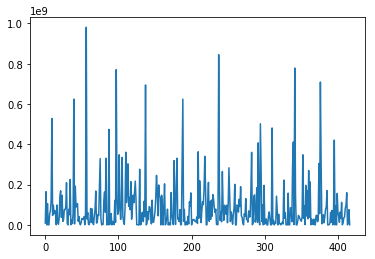

In [355]:
plt.plot(y_test)

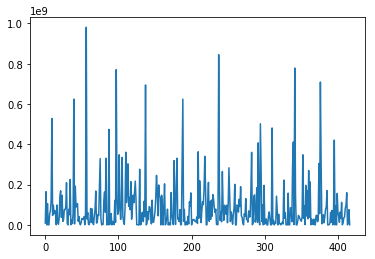

In [356]:
plt.plot(predictions)

In [349]:
print(metrics.mean_absolute_error(y_test, predictions))

0.000535476821725


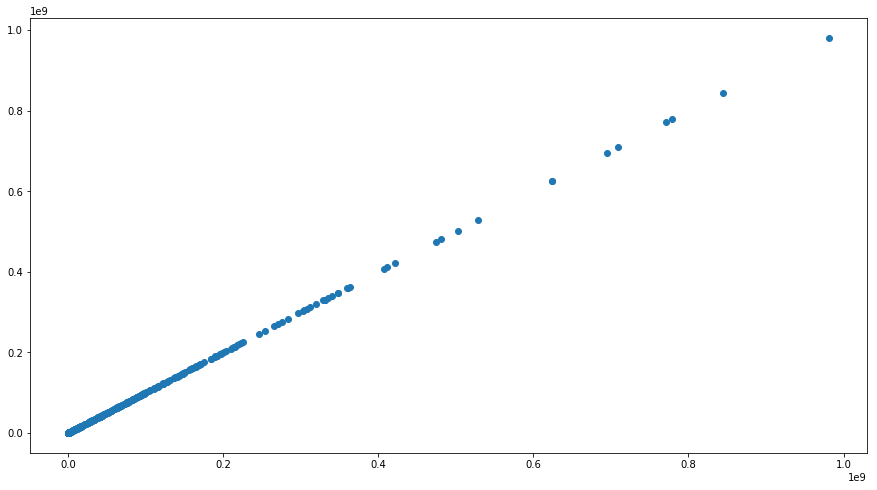

In [350]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)

In [353]:
np.mean((predictions-y_test)**2)

4.6348364990873222e-07